**Importing the the tools**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

**Importing Data**

In [ ]:
data = pd.read_csv("/content/Housing.csv")

In [ ]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Cleaning

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Preperation
There  are a few categorical variables which needs to be converted to numerical values.
There are yes or no variables so I will use custom mapping function.

In [ ]:
columns_to_change = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','furnishingstatus']

#define the map function
data = pd.get_dummies(data, columns=columns_to_change, dtype=float)


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


<Axes: >

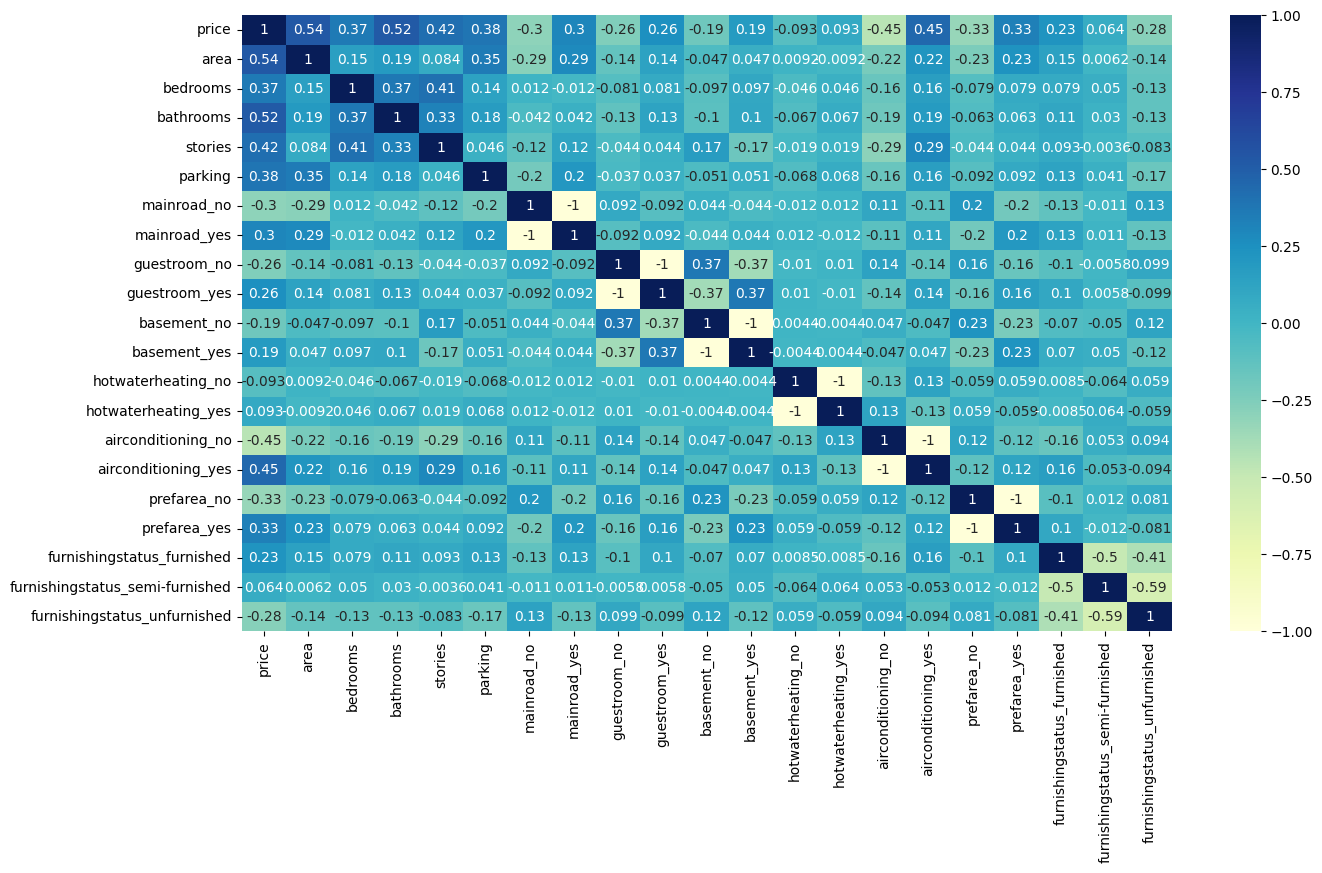

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')

# Data split

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['price'],axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

#Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)
test_data = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)





In [ ]:
test_data

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,...,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,0.292096,0.6,0.333333,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.220000
1,0.333333,0.4,0.333333,0.666667,0.000000,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.466667
2,0.164261,0.2,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.186667
3,0.230241,0.4,0.000000,0.333333,0.000000,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.446667
4,0.158763,0.4,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.298969,0.6,0.000000,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.700000
105,0.362887,0.6,0.000000,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.192667
106,0.298969,0.6,0.333333,1.000000,0.333333,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.586667
107,0.298969,0.4,0.333333,0.333333,0.333333,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.533333


#Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize the linear regression model
model1 = LinearRegression()

# Train the model
model1.fit(X_train, y_train)



LinearRegression()

In [ ]:
model1.score(X_test, y_test)

0.6529242642153188

In [ ]:
# Make predictions on the test set
y_pred = model1.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 1754318687330.6616
R-squared Score: 0.6529242642153188


#ANN with out regularization
## Three layes
## 1-> 50 units , relu
## 2-> 100 units, relu
## 3-> 50 units, relu
## 4-> 1 unit

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

model2 = Sequential()
model2.add(Dense(50, input_dim=20, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
model2.summary()

model2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)


mse = model2.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')











# ANN without regularization
## Layers
1. 4 units, relu
2. 10 units, relu
3. 1 units (output)

In [ ]:
model3 = Sequential()
model3.add(Dense(4, input_dim=20, activation='relu'))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
model3.summary()

model3.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.2)


mse = model3.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

# ANN with l2 regularization
## layers
1. 50 units, relu
2. 100 units, relu
3. 50 units, relu
4. 1 unit, output

In [ ]:
# now do it with l2 regularization

from keras import regularizers
model4 = Sequential()
model4.add(Dense(50, input_dim=20, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model4.add(Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model4.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
model4.summary()

model4.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

mse = model4.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')





#ANN with l2 regularization
## layers
1. 4 units, relu
2. 10 units, relu
3. 4 units, relu
4. output

## l2 = 0.05

In [ ]:
from keras import regularizers
model5 = Sequential()
model5.add(Dense(4, input_dim=20, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model5.add(Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model5.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model5.add(Dense(1))
model5.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
model5.summary()

model5.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

mse = model5.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

In [ ]:
import matplotlib.pyplot as plt

# Mean Squared Error for Linear Regression
mse_linear_regression = mean_squared_error(y_test, y_pred)

# Mean Squared Error for ANN without regularization ()
mse_ann_no_regularization = model2.evaluate(X_test, y_test)[0]
mse_ann_no_regularization2 = model3.evaluate(X_test, y_test)[0]

# Mean Squared Error for ANN with L2 regularization (0.01)
mse_ann_l2_001 = model4.evaluate(X_test, y_test)[0]

# Mean Squared Error for ANN with L2 regularization (0.05)
mse_ann_l2_005 = model5.evaluate(X_test, y_test)[0]

# Create a bar plot
models = ['Linear Regression', 'ANN without Regularization(50  100  50 1) ','ANN without Regularization(4  10  1)' , 'ANN L2 (0.01) (50 100 50 1)', 'ANN L2 (0.05) (4 10 1)']
mse_values = [mse_linear_regression, mse_ann_no_regularization,mse_ann_no_regularization2, mse_ann_l2_001, mse_ann_l2_005]

plt.figure(figsize=(15, 12))
plt.bar(models, mse_values, color=['blue', 'orange','pink', 'green', 'red'])
plt.title('Comparison of Model Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()
